In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Dummy dataset for Oil and Gas
data = {
    'Drilling Depth (ft)': [8000, 8500, 9000, 9500, 10000, 10500, 11000, 7000, 7200, 6800],
    'Mud Weight (lb/gal)': [9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 8.5, 8.8, 9.1],
    'Formation Pressure (psi)': [2000, 2200, 2400, 2600, 2800, 3000, 3200, 1800, 1900, 1700],
    'Well Type': ['Oil Well', 'Gas Well', 'Gas Well', 'Oil Well', 'Dry Well', 'Dry Well', 'Gas Well', 'Oil Well', 'Dry Well', 'Oil Well']
}

In [6]:
# Convert dataset into a DataFrame
df = pd.DataFrame(data)
df.head()

,Drilling Depth (ft),Mud Weight (lb/gal),Formation Pressure (psi),Well Type
0,8000,9.0,2000,Oil Well
1,8500,9.5,2200,Gas Well
2,9000,10.0,2400,Gas Well
3,9500,10.5,2600,Oil Well
4,10000,11.0,2800,Dry Well


In [7]:
# Mapping well types to numerical values for classification
well_type_mapping = {'Oil Well': 0, 'Gas Well': 1, 'Dry Well': 2}
df['Well Type'] = df['Well Type'].map(well_type_mapping)

In [8]:
# Check the structure and summary of the dataset
print(df.head())  # Display the first few rows of the dataset
print(df.describe())  # Summary statistics
print(df.info())  # Information about data types and missing values
 

   Drilling Depth (ft)  Mud Weight (lb/gal)  Formation Pressure (psi)  \
0                 8000                  9.0                      2000   
1                 8500                  9.5                      2200   
2                 9000                 10.0                      2400   
3                 9500                 10.5                      2600   
4                10000                 11.0                      2800   

   Well Type  
0          0  
1          1  
2          1  
3          0  
4          2  
       Drilling Depth (ft)  Mud Weight (lb/gal)  Formation Pressure (psi)  \
count            10.000000            10.000000                 10.000000   
mean           8750.000000             9.990000               2360.000000   
std            1498.332406             1.213306                525.357021   
min            6800.000000             8.500000               1700.000000   
25%            7400.000000             9.025000               1925.000000   
50%      

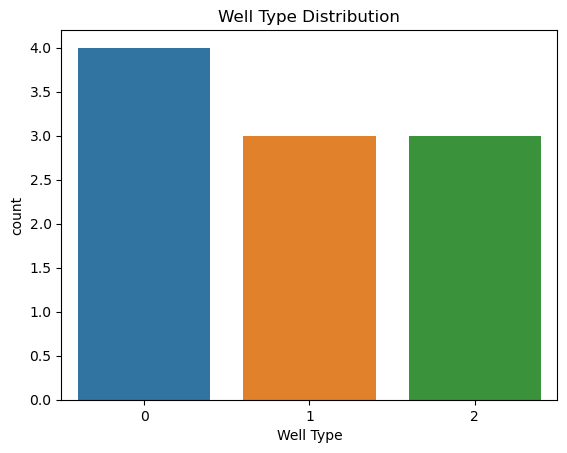

In [9]:
# Data visualization
# Distribution of Well Types
sns.countplot(x='Well Type', data=df)
plt.title("Well Type Distribution")
plt.show()

C:\Users\User\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\User\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


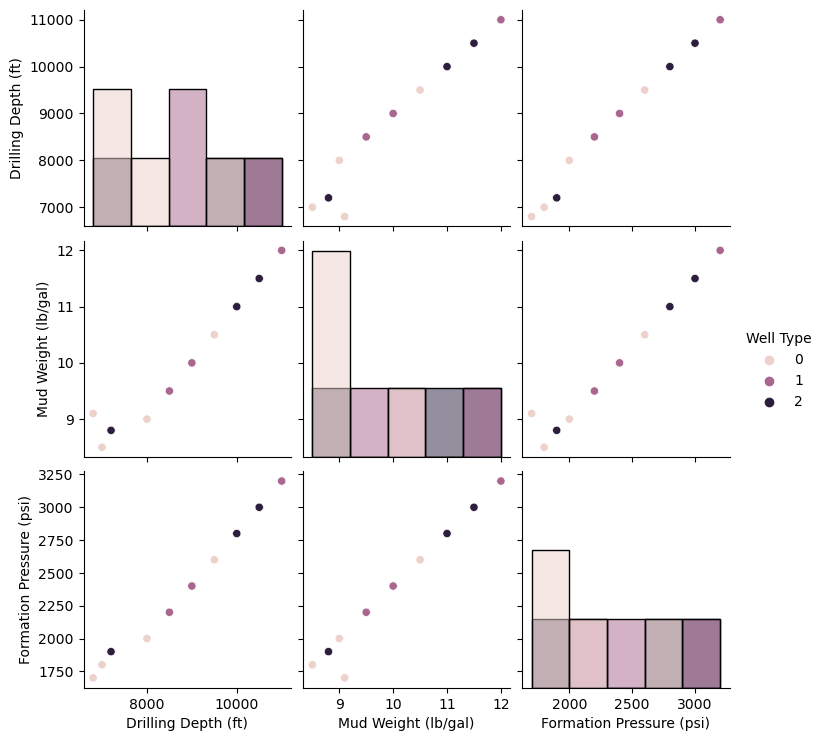

In [10]:
# Pair plot for numerical data
sns.pairplot(df, hue="Well Type", diag_kind="hist")
plt.show()

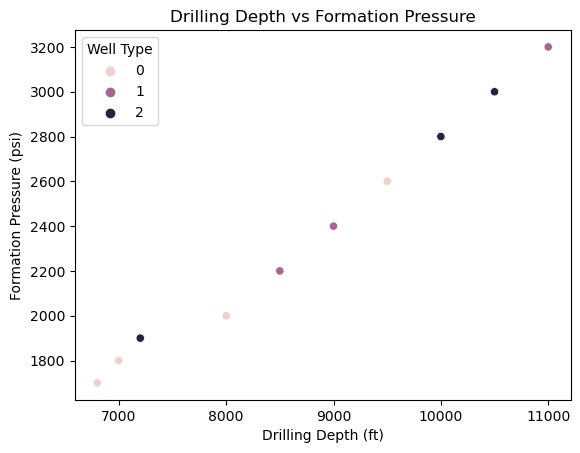

In [11]:
# Scatter plot for Drilling Depth vs Formation Pressure
sns.scatterplot(x='Drilling Depth (ft)', y='Formation Pressure (psi)', hue='Well Type', data=df)
plt.title("Drilling Depth vs Formation Pressure")
plt.show()

In [13]:
# Preprocessing: Normalize the data
features = df.iloc[:, :-1]  # Select only the feature columns
target = df.iloc[:, -1]  # Select the target column
scaler = MinMaxScaler()
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
 
print(normalized_features.head())  # Check normalized features

   Drilling Depth (ft)  Mud Weight (lb/gal)  Formation Pressure (psi)
0             0.285714             0.142857                  0.200000
1             0.404762             0.285714                  0.333333
2             0.523810             0.428571                  0.466667
3             0.642857             0.571429                  0.600000
4             0.761905             0.714286                  0.733333


In [14]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_features, target, test_size=0.2, random_state=42)

In [15]:
# Building the KNN model
k = 3  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)  # Train the model

KNeighborsClassifier(n_neighbors=3)

In [16]:
# Predictions
y_pred = knn.predict(X_test)

In [17]:
# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[0 0 0]
 [1 0 0]
 [1 0 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\Users\User\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(a

In [18]:
# Predict for a new well
new_data = np.array([[9500, 10.8, 2700]])  # Example: New well with drilling depth, mud weight, and formation pressure
new_data_normalized = scaler.transform(new_data)
predicted_class = knn.predict(new_data_normalized)
well_type = [key for key, value in well_type_mapping.items() if value == predicted_class[0]][0]
print(f"\nPredicted Well Type: {well_type}")


Predicted Well Type: Oil Well


C:\Users\User\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Additional Notes:

25 Machine Learning Projects for all levels: https://www.datacamp.com/blog/machine-learning-projects-for-all-levels

Data Science/ ML/ Streamlit: https://www.linkedin.com/posts/riyazahd_datascience-machinelearning-streamlit-activity-7315675900367237120-St9A/?utm_source=share&utm_medium=member_desktop&rcm=ACoAAAlrAg0BOtlbNoOCIcZd5OPk_gF9qChJn38

Kaggle Competition: https://www.kaggle.com/competitions